#### Deep Learning (kernel : conda root)
Assignment 1

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the notMNIST dataset to be used with python experiments. This dataset is designed to look like the classic MNIST dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
#from _future_ import print_function   #with this module , should use print(..)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
import urllib
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
import cPickle as pickle

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'http://yaroslavvb.com/upload/notMNIST/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urllib.urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print 'Found and verified', filename
  else:
    raise Exception(
      'Failed to verify' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified notMNIST_large.tar.gz
Found and verified notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file. This should give you a set of directories, labelled A through J.

In [6]:
num_classes = 10
#num_classes = 20

def extract(filename):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # removed .tar.gz,such as notMNIST_large
  if not os.path.exists(root):    #if not exit notMNIST_large
      tar = tarfile.open(filename)
      tar.extractall()
      tar.close()
  data_folders = [os.path.join(root, d) for d in sorted(os.listdir(root))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print data_folders
  return data_folders
  
train_folders = extract(train_filename)
test_folders = extract(test_filename)

['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']


#### Problem 1

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.


In [7]:
#0. conerstone ver.
import os, random
dir_name = "notMNIST_large"
folder_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
for folder in folder_names:
    im_name = random.choice(os.listdir(dir_name + "/" + folder))
    im_file = dir_name + "/" + folder + "/" + im_name
    display(Image(filename=im_file))



In [8]:
# 1. basic version
display(Image("notMNIST_small/A/MDEtMDEtMDAudHRm.png"), Image("notMNIST_small/D/MDEtMDEtMDAudHRm.png"))
display(Image("notMNIST_small/D/MDEtMDEtMDAudHRm.png"))
display(Image("notMNIST_small/C/MDEtMDEtMDAudHRm.png"))
display(Image("notMNIST_small/B/MDEtMDEtMDAudHRm.png"))

In [9]:
for i in xrange(len(train_folders[0])/5):
    print (os.listdir(train_folders[0])[i])
print("*"*60)
#result1 = os.listdir(train_folders[0])[i] for i in xrange(len(train_folders[0]))  #w/o [ ], error !  
result1 = [os.listdir(train_folders[0])[i] for i in xrange(len(train_folders[0]))] #all file in 'notMNIST_large/A'   
print (result1)
print("len(train)folders)",len(train_folders))

# for i in xrange(len)
# display(Image(random.choice()


R3JvdGVzcXVlTVRTdGQtTGlnaHRDb25kLm90Zg==.png
TUJvZG9uaS5vdGY=.png
U2VhZ3VsbC1CbGFja0l0YS5vdGY=.png
************************************************************
['R3JvdGVzcXVlTVRTdGQtTGlnaHRDb25kLm90Zg==.png', 'TUJvZG9uaS5vdGY=.png', 'U2VhZ3VsbC1CbGFja0l0YS5vdGY=.png', 'QnJvdGhlcnNTdXBlclNsYW50QWx0ZXJuYXRlcy5vdGY=.png', 'TWluaSBQaWNzIFphZnJpY2EudHRm.png', 'SVRDIFN1cmZib2FyZCBMVC50dGY=.png', 'Q2FzbG9uQm9va0JFLUl0YWxpY09zRi5vdGY=.png', 'RmxpbnRzdG9uZSBDb25kZW5zZWQgSXRhbGljLnR0Zg==.png', 'QXJtYWRhLVRoaW5Db21wcmVzc2VkLm90Zg==.png', 'TmV3Q2FsZWRvbmlhLUJvbGRTQy5vdGY=.png', 'TEhGIEVjY2VudHJpYyBGcmVuY2ggTGlnaHQudHRm.png', 'RnV0dXJhQ29uZEJvbGRPYmxpcXVlLm90Zg==.png', 'Rm9yYmVzIEJvbGQudHRm.png', 'Q2hhbmV5IFdpZGUgTm9ybWFsLnR0Zg==.png', 'Tm9ydGhCZXJnZW4tTGlnaHQub3Rm.png', 'Q29uY3Vyc2ljbyBNb25vIEJUTi50dGY=.png']
('len(train)folders)', 10)


In [10]:
for img_class in os.listdir("notMNIST_large"):
    try:
        img_file = np.random.choice(os.listdir("notMNIST_large/" + img_class))
        print img_file
        print "notMNIST_large/" + img_class + "/" + img_file
    except OSError  as e:
        print ('Not a directory:', img_file, ':', e, '- it\'s ok, skipping.')  #error, since excute after below cell,


Q29ydGV4IFNTaS50dGY=.png
notMNIST_large/B/Q29ydGV4IFNTaS50dGY=.png
RWJvbGEgS2lrd2l0LnR0Zg==.png
notMNIST_large/G/RWJvbGEgS2lrd2l0LnR0Zg==.png
QUJTNi50dGY=.png
notMNIST_large/F/QUJTNi50dGY=.png
RmF0RmFjZUMub3Rm.png
notMNIST_large/E/RmF0RmFjZUMub3Rm.png
UDIyVW5kZXJncm91bmRCb2xkLm90Zg==.png
notMNIST_large/A/UDIyVW5kZXJncm91bmRCb2xkLm90Zg==.png
QmVsZmFzdC1SZWd1bGFyLm90Zg==.png
notMNIST_large/I/QmVsZmFzdC1SZWd1bGFyLm90Zg==.png
Um9yeSBJdGFsaWMudHRm.png
notMNIST_large/H/Um9yeSBJdGFsaWMudHRm.png
RXJhcy1Cb2xkIFRoLnR0Zg==.png
notMNIST_large/J/RXJhcy1Cb2xkIFRoLnR0Zg==.png
SGVhcnRCcmVha2VyIEJUTi50dGY=.png
notMNIST_large/C/SGVhcnRCcmVha2VyIEJUTi50dGY=.png
QWRkU3BlZWR5LnR0Zg==.png
notMNIST_large/D/QWRkU3BlZWR5LnR0Zg==.png


In [11]:
#2. for loop fixed foder suffix +'/'+  ver.  
for img_class in os.listdir("notMNIST_large"):
    try : 
        img_file = np.random.choice(os.listdir("notMNIST_large/" + img_class))
        display(Image("notMNIST_large/" + img_class + "/" + img_file))
    except OSError  as e:
        print ('Not a directory:', img_file, ':', e, '- it\'s ok, skipping.')


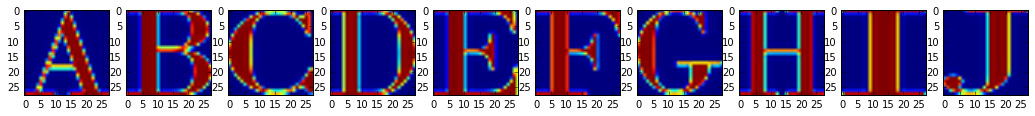

In [12]:
#3. loop version
%matplotlib inline
fig = plt.figure(figsize=(18,5))
count = 1
for e in train_folders:   # ['notMNIST_large/A', 'notMNIST_large/B',...]
    for x in os.listdir(e):  #file or subdir in 'notMNIST_large/A' , such as MDEtMDEtMDAudHRm.png
        if x.endswith('.png') and "==" not in x:
            fig.add_subplot(1, 10, count)
            plt.imshow(plt.imread(e+"/"+x))
            break
    count+=1


Now let's load the data in a more manageable format.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. The labels will be stored into a separate array of integers 0 through 9.

A few images might not be readable, we'll just skip them.


In [13]:
# ### Never excute it !!! ## it takes too long time. !!!  
# ## it is not udacity version,which loadletter(data_jfolders, min_num_images)  ##
# image_size = 28  # Pixel width and height.
# pixel_depth = 255.0  # Number of levels per pixel.

# def load(data_folders, min_num_images, max_num_images):
#   dataset = np.ndarray(
#     shape=(max_num_images, image_size, image_size), dtype=np.float32)
#   labels = np.ndarray(shape=(max_num_images), dtype=np.int32)
#   label_index = 0
#   image_index = 0
#   for folder in data_folders:
#     print folder
#     for image in os.listdir(folder):   #image is each img files in folder dir
#       if image_index >= max_num_images:
#         raise Exception('More images than expected: %d >= %d' % (
#           num_images, max_num_images))
#       image_file = os.path.join(folder, image)   #image_file is "folder/image_name"
#       try:
#         #image_data is normalized version of image_file, which has mean 0    
#         image_data = (ndimage.imread(image_file).astype(float) -
#                       pixel_depth / 2) / pixel_depth
#         if image_data.shape != (image_size, image_size):
#           raise Exception('Unexpected image shape: %s' % str(image_data.shape))
#         dataset[image_index, :, :] = image_data #convert image_data to 3d array,dataset[0,:,:]=each img file in folder
#                                                 #dataset[1,:,:]=each img file in folder
#         labels[image_index] = label_index       #label_index = 0,1,2,.., labels[0]=0, labels[1]=1,       
#         image_index += 1
#       except IOError as e:
#         print 'Could not read:', image_file, ':', e, '- it\'s ok, skipping.'
#     label_index += 1
#   num_images = image_index  #the end of for loop of folder, num_image(=image_index) is total number of image
#   dataset = dataset[0:num_images, :, :]
#   labels = labels[0:num_images]
#   if num_images < min_num_images:
#     raise Exception('Many fewer images than expected: %d < %d' % (
#         num_images, min_num_images))
#   print 'Full dataset tensor:', dataset.shape
#   print 'Mean:', np.mean(dataset)
#   print 'Standard deviation:', np.std(dataset)
#   print 'Labels:', labels.shape
#   return dataset, labels
# train_dataset, train_labels = load(train_folders, 450000, 550000)
# test_dataset, test_labels = load(test_folders, 18000, 20000)


In [14]:
## udacity versin ..
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  for image_index, image in enumerate(image_files):
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[image_index, :, :] = image_data
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  num_images = image_index + 1
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling notMNIST_large/A.pickle.
notMNIST_large/A
('Could not read:', 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png', ':', IOError("cannot identify image file 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png'",), "- it's ok, skipping.")
('Could not read:', 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png', ':', IOError("cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png'",), "- it's ok, skipping.")
('Could not read:', 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png', ':', IOError("cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (52912, 28, 28))
('Mean:', -0.12824284)
('Standard deviation:', 0.44310904)
Pickling notMNIST_large/B.pickle.
notMNIST_large/B
('Could not read:', 'notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png', ':', IOError("cannot identify image file 'notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png'",), "- it's ok, s

#### Problem 2

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

In [20]:
train_datasets

['notMNIST_large/A.pickle',
 'notMNIST_large/B.pickle',
 'notMNIST_large/C.pickle',
 'notMNIST_large/D.pickle',
 'notMNIST_large/E.pickle',
 'notMNIST_large/F.pickle',
 'notMNIST_large/G.pickle',
 'notMNIST_large/H.pickle',
 'notMNIST_large/I.pickle',
 'notMNIST_large/J.pickle']

In [21]:
print "train_datasets[0] :",train_datasets[0]
print "train_datasets[1] :",train_datasets[1]
print len(train_datasets)
file = open(train_datasets[0])
train_A = pickle.load(file)
print train_A.shape  
print type(train_A)
#print "* train_A[0] :\n",train_A[0]  same with trainA[0,:,:]
print "*"*60
print train_A[0,:,:]
print len(train_A[0]), len(train_A[0,:,:])

train_datasets[0] : notMNIST_large/A.pickle
train_datasets[1] : notMNIST_large/B.pickle
10
(52912, 28, 28)
<type 'numpy.ndarray'>
************************************************************
[[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49215686 -0.5        -0.43333334  0.21372549  0.5         0.48431373
   0.5         0.5         0.48039216  0.5         0.0372549  -0.5
  -0.48431373 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.48431373 -0.5        -0.2372549   0.47647059  0.49607843  0.5
   0.23333333  0.42156863  0.49607843  0.5         0.29215688 -0.37450981
  -0.5        -0.49215686 -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49607843 -0.5        -0.00196078  0.5         0.46862745  0.5
  -0.170588

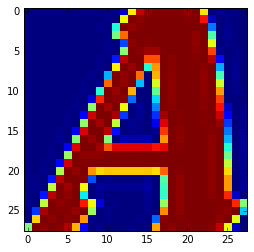

In [22]:
# first load the pickle file, loading one for illustration purpose
t = pickle.load(open("notMNIST_large/A.pickle", "r"))
# need to use matplotlib inline if want to show at jupyter Notebook
%matplotlib inline
# plot one of image. the number 5 to be exactly
plt.imshow(t[2], interpolation='nearest')
# show the image
plt.show()


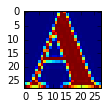

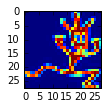

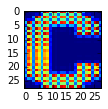

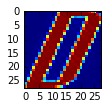

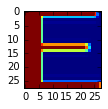

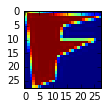

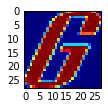

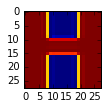

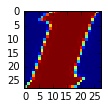

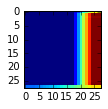

In [23]:
%matplotlib inline
import random
for i in range(1,11):
    fig = plt.figure(figsize=(18,5))
    fig.add_subplot(1, 11, i)
#     plt.imshow(train_datasets[i])  #tran_datasets[0]='notMNIST_large/A.pickle',  ~[1]= '~/B.pickle'
#     plt.xlabel(train_labels[i])
    ##############################
#     num = random.randint(0,len(train_dataset[i]))
#     print "number :",num 
#     plt.imshow(train_dataset[num,:,:])
    with open(train_datasets[i-1], 'rb') as f:
        letter = pickle.load(f)
    num = random.randint(0,len(train_datasets[i-1]))
    plt.imshow(letter[num], interpolation='nearest')
    plt.show()

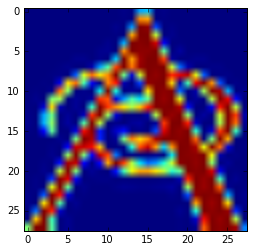

In [24]:
plt.imshow(train_A[10,:,:])

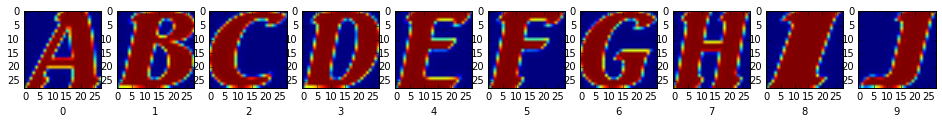

In [25]:
#ver 1
%matplotlib inline
fig = plt.figure(figsize=(18,5))
for i in range(1,11):
    fig.add_subplot(1, 11, i) 
    k= open(train_datasets[i-1],'rb')
    letter1 = pickle.load(k)
    plt.imshow(letter1[2])
    plt.xlabel(i-1)

NameError: global name 'train_labels' is not defined

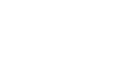

In [27]:
#ver 2  this is successful for below cell, Problem3,
def plot_random_data(width = 4, height = 4):
    n_plot_imgs = width * height
    label_names = [s.split("/")[-1] for s in train_folders]

    for i in range(1, n_plot_imgs + 1):
        plt.subplot(height, width, i)
        plt.tight_layout()
        plt.axis("off")
        img_id = np.random.choice(len(train_labels))
        plt.imshow(train_dataset[img_id, :, :])
        img_label = label_names[train_labels[img_id]]
        plt.title(img_label)
    plt.show()
    
plot_random_data()

#### Problem 3

Another check: we expect the data to be balanced across classes. Verify that.

Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune train_size as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.


In [28]:
#from problem1. , 0 coner version.
import pandas as pd
import matplotlib.pyplot as plt
len_dict = {}
print "* folder_names : ",folder_names
class_list= folder_names
mean_list=[]
std_list=[]
for folder in folder_names:
    t = pickle.load(open(dir_name + "/" + folder + ".pickle", "r"))
    print t
    len_dict[folder] = len(t)
    print "********* t.mean():",t.mean()
    print "********* np.mean(t) :",np.mean(t)
    mean_list.append(np.mean(t))
    print "^^^^^^^^^ np.std(t)",np.std(t)
    std_list.append(np.std(t))
print(len_dict)
class_list = pd.Series(class_list)
mean_list = pd.Series(mean_list)
std_list = pd.Series(std_list)
# columns = ['mean_list', 'std_list']
# index = ['class_name']
df = pd.DataFrame({ 'class_name' : class_list,
                    'mean_list'  : mean_list,
                    'std_list'   : std_list
                  })
print df

* folder_names :  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
[[[-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
  [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
  [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
  ..., 
  [-0.38235295  0.48039216  0.49607843 ...,  0.49607843  0.46078432
   -0.39803922]
  [-0.06470589  0.5         0.49215686 ...,  0.49215686  0.5        -0.08431373]
  [ 0.31960785  0.5         0.5        ...,  0.5         0.5         0.31176472]]

 [[-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
  [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
  [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
  ..., 
  [-0.5        -0.5        -0.48823529 ..., -0.49607843 -0.5        -0.5       ]
  [-0.36666667 -0.36274511 -0.37843138 ..., -0.39411765 -0.35882354
   -0.36666667]
  [ 0.43725491  

            mean_list  std_list
class_name                     
A           -0.128243  0.443109
B           -0.007563  0.454487
C           -0.142258  0.439806
D           -0.057367  0.455644
E           -0.069899  0.452942
F           -0.125583  0.447090
G           -0.094581  0.446240
H           -0.068522  0.454232
I            0.030786  0.468898
J           -0.153358  0.443657


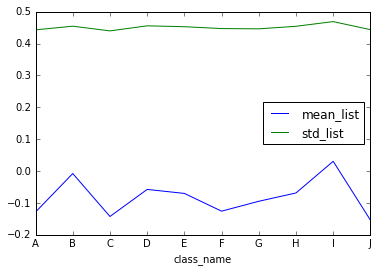

In [29]:
df2=df.set_index('class_name')
print df2

df2.plot()

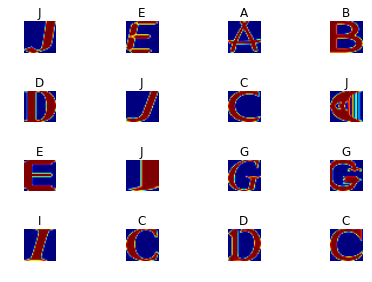

In [38]:
#version 1
#train_folders=['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 
#'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 
#'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
def plot_random_data(width = 4, height = 4):
    n_plot_imgs = width * height
    label_names = [s.split("/")[-1] for s in train_folders]  #splitted ['A','B',..]

    for i in range(1, n_plot_imgs + 1):
        plt.subplot(height, width, i)
        plt.tight_layout()
        plt.axis("off")
        img_id = np.random.choice(len(train_labels))
        plt.imshow(train_dataset[img_id, :, :])
        img_label = label_names[train_labels[img_id]]
        plt.title(img_label)
    plt.show()
    
plot_random_data()

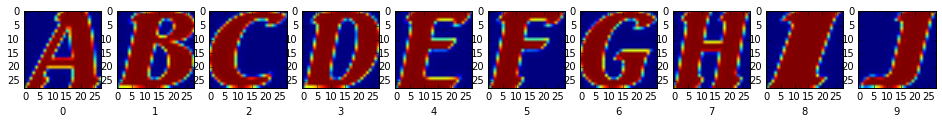

In [39]:
#version 2  : same result with different datasets
fig = plt.figure(figsize=(18,5))   #from above cell 
for i in range(1,11):
    fig.add_subplot(1, 11, i) 
    k= open(train_datasets[i-1],'rb')
    letter1 = pickle.load(k)
    plt.imshow(letter1[2])
    plt.xlabel(i-1)

# %matplotlib inline
# fig = plt.figure(figsize=(18,5))
# for i in range(1,11):
#     fig.add_subplot(1, 11, i) 
#     plt.imshow(train_dataset[i-1])
#     plt.xlabel(train_labels[i-1])

#### Merge and prune the training data 

Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune train_size as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.


In [40]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32) # nb_rows of (img_size by img_size) array
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

#train_dataset: array consists of 200000 row of (28by28array)
#trani_lables : array consist of train_labels: 10000 row of(28by28 array) 
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

('Training:', (200000, 28, 28), (200000,))
('Validation:', (10000, 28, 28), (10000,))
('Testing:', (10000, 28, 28), (10000,))


#### Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [42]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [75]:
#test
print train_labels
perm = train_labels.shape[0]
print perm
print train_labels.shape
print train_labels[0]
print train_labels[1]
print train_labels[2]
print train_labels[-1]
print type(train_labels)

print"^"*80
print "train_dataset.shape : ",train_dataset.shape
print "** train_dataset : array consists of 200000 row of (28by28array) :\n",train_dataset
print"*"*60
print "** train_dataset.shape[0] :",train_dataset.shape[0]
print"*"*60
print "\n** train_dataset[0].shape :\n ",train_dataset[0].shape
print "\n** train_dataset[0] :\n ",train_dataset[0]

print"*"*60
print "\n** train_dataset[1].shape :\n ",train_dataset[1].shape
print "\n** train_dataset[1] :\n",train_dataset[1]




[3 3 5 ..., 1 8 4]
200000
(200000,)
3
3
5
4
<type 'numpy.ndarray'>
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
train_dataset.shape :  (200000, 28, 28)
** train_dataset : array consists of 200000 row of (28by28array) :
[[[-0.46470588 -0.29215688 -0.11176471 ..., -0.5        -0.5        -0.5       ]
  [ 0.17450981  0.5         0.5        ..., -0.5        -0.5        -0.5       ]
  [-0.19411765 -0.03333334  0.07254902 ..., -0.5        -0.5        -0.5       ]
  ..., 
  [-0.5        -0.5        -0.30000001 ..., -0.5        -0.5        -0.5       ]
  [ 0.02156863  0.22941177  0.45294118 ..., -0.5        -0.5        -0.5       ]
  [ 0.42941177  0.5         0.49607843 ..., -0.5        -0.5        -0.5       ]]

 [[ 0.5         0.5         0.5        ..., -0.46078432 -0.5        -0.49215686]
  [ 0.5         0.5         0.5        ...,  0.3392157  -0.23333333 -0.5       ]
  [ 0.5         0.5         0.5        ...,  0.5         0.45686275
   -0.24901961]
  .

#### Problem 4

Convince yourself that the data is still good after shuffling!

In [92]:
## version 1.
# Since after shuffling, the image for each count for each train_labels and 
# test_labels is the same, therefore we can say that the data is still good after shuffling!

#np.bincount():Count number of occurrences of each value in array of non-negative ints.
print "*test : np.bincount(np.array([0, 1, 1, 3, 2, 1, 7])) :",np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))
print "*test : np.bincount(np.arange(6)) :",np.bincount(np.arange(6)) 
print "*** freq count for training data:",(np.bincount(train_labels))
print "*** freq count for test data:",(np.bincount(test_labels))
#np.unique() : Returns the sorted unique elements of an array
print "*test : np.unique([1, 1, 2, 2, 3, 3]) : ",np.unique([1, 1, 2, 2, 3, 3])
print(np.unique(train_labels))
print(np.unique(test_labels))
print "No more duplicated values among classes !"

*test : np.bincount(np.array([0, 1, 1, 3, 2, 1, 7])) : [1 3 1 1 0 0 0 1]
*test : np.bincount(np.arange(6)) : [1 1 1 1 1 1]
*** freq count for training data: [20000 20000 20000 20000 20000 20000 20000 20000 20000 20000]
*** freq count for validation data: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
*** freq count for test data: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
*test : np.unique([1, 1, 2, 2, 3, 3]) :  [1 2 3]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
No more duplicated values among classes !


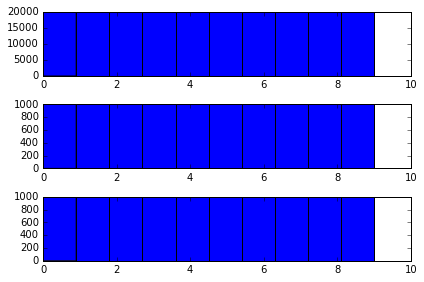

In [89]:
#version 2
fig, ax = plt.subplots(3, 1)
ax[0].hist(train_labels, 10)
ax[1].hist(test_labels, 10)
ax[2].hist(valid_labels, 10)
fig.tight_layout()

#### Finally, let's save the data for later reuse

In [95]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise


In [96]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

('Compressed pickle size:', 690800441)


#### Problem 5

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it. Measure how much overlap there is between training, validation and test samples.

Optional questions:

    What about near duplicates between datasets? (images that are almost identical)
    Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments
    

In [101]:
#ver 0  ,not sure correctness
def reshape(a):
    return a.reshape(a.shape[0],a.shape[1]*a.shape[2])
t = pickle.load(open("notMNIST.pickle", "r"))
k=t['train_dataset']
#unique_td = unique_rows(reshape(k))  #not defined error
unique_td = np.unique(reshape(k))
duplicate_rows = len(t['train_dataset']) - len(unique_td)
print(duplicate_rows)

199743


In [104]:
#ver 1
train_dataset.flags.writeable = False
valid_dataset.flags.writeable = False
test_dataset.flags.writeable = False

train_hash = [hash(e.data) for e in train_dataset]
valid_hash = [hash(e.data) for e in valid_dataset]
test_hash = [hash(e.data) for e in test_dataset]
print "* train_hash[0:2] :",train_hash[0:2]
unique_train_hash = set(train_hash)
valid_overlap = unique_train_hash.intersection(set(valid_hash))  #find a train_hash  duplicaed with valid_hash
test_overlap = unique_train_hash.intersection(set(test_hash))    #find a train_hash  duplicaed with test_hash

print('Duplicates inside training set: ', len(train_hash) - len(unique_train_hash))
print('Duplicates between training and validation: ', len(valid_overlap))
print('Duplicates between training and test: ', len(test_overlap))


train_hash[0:2] : [7732911557132623040, -5866001267943134062]
('Duplicates inside training set: ', 12761)
('Duplicates between training and validation: ', 910)
('Duplicates between training and test: ', 1074)


#### Problem 6

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!


In [106]:
#ver 1.
from sklearn.linear_model import LogisticRegression

train_sample = train_dataset[:5000,:,:]  #using 5000 samples.
train_sample_labels = train_labels[:5000]

(samples, width, height) = train_sample.shape
train_sample = np.reshape(train_sample, (samples, width * height))

(samples, width, height) = test_dataset.shape
test_dataset = np.reshape(test_dataset, (samples, width * height))

model = LogisticRegression(penalty='l2', C=1.0)
model.fit(train_sample, train_sample_labels)

train_score = model.score(train_sample, train_sample_labels)
test_score = model.score(test_dataset, test_labels)
print('Training score = ', train_score)
print('Test score = ', test_score)

('Training score = ', 0.94020000000000004)
('Test score = ', 0.85250000000000004)


In [105]:
#ver 2_ 1st
from sklearn.metrics import accuracy_score
reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0)
#training_size = [50,100,1000,5000]
training_size = [50,100,1000,2000,3000,4000,5000,6000,7000,8000]
X = train_dataset.reshape(200000,784)
output_predictions = []
for i in training_size:
    reg.fit(X[:i],train_labels[:i]) #ex) train_labels[:50],
    pred = reg.predict(X[i+1:i*2])
    output_predictions.append(accuracy_score(train_labels[i+1:i*2],pred))

print output_predictions

[0.61224489795918369, 0.5757575757575758, 0.77077077077077072, 0.77388694347173592, 0.77059019673224405, 0.77394348587146788, 0.77375475095019008, 0.77396232705450907, 0.77782540362908992, 0.77872234029253662]


In [109]:
#ver 2_ 1st
from sklearn.metrics import accuracy_score
reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0)
training_size = [50,100,1000,5000]
#training_size = [50,100,1000,2000,3000,4000,5000,6000,7000,8000]
X = train_dataset.reshape(200000,784)
output_predictions = []
for i in training_size:
    reg.fit(X[:i],train_labels[:i]) #ex) train_labels[:50],
    pred = reg.predict(X[i+1:i*2])
    output_predictions.append(accuracy_score(train_labels[i+1:i*2],pred))

print output_predictions

[0.61224489795918369, 0.5757575757575758, 0.77077077077077072, 0.77375475095019008]


In [110]:
#ver 2_ 2nd
## do a complete train over all possible trainign examples
from sklearn.metrics import accuracy_score
reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0)
X = train_dataset.reshape(200000,784)
reg.fit(X,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#ver 2_ 3rd
# this is the output on the validation set
valid_X = valid_dataset.reshape(10000,784)
pred = reg.predict(valid_X)
print accuracy_score(valid_labels,pred)

test
print test_dataset.shape

In [1]:
#ver 2_ 4th
%matplotlib inline
plt.figure(figsize=(11,5))
plt.plot(training_size, output_predictions)

NameError: name 'plt' is not defined

In [ ]:
#ver 2
def reshape(a):
    return a.reshape(a.shape[0],a.shape[1]*a.shape[2])
t = pickle.load(open("notMNIST.pickle", "r"))
y = t['train_labels']
X = reshape(t['train_dataset']) # reshape it to 2d array
del(t) # this should free up more memory spaces
# choose form 0:10000 because not enough memory for the docker
# probably a way to do batch learning with scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html
C = 1.0
classifier = LogisticRegression(C=C, penalty='l1')
classifier.fit(X[0:10000], y[0:10000])
y_pred = classifier.predict(X)
classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("classif_rate for %f " % (classif_rate))
# we now see how it is predicted using sample 10001 to 20000, which is not used for training
# actually should calculate the accuracy in percentage.
print(y[10001:20000])
print(y_pred[10001:20000])



In [ ]:
y_pred = classfier.predict(X)
classif_rate = np.mean(y_pred.ravel() == y.ravel())*100
print "classif_rate_for %f " % (classif_rate)


In [ ]:
print y[10001:20000]
print y_pred[10001:20000]